/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


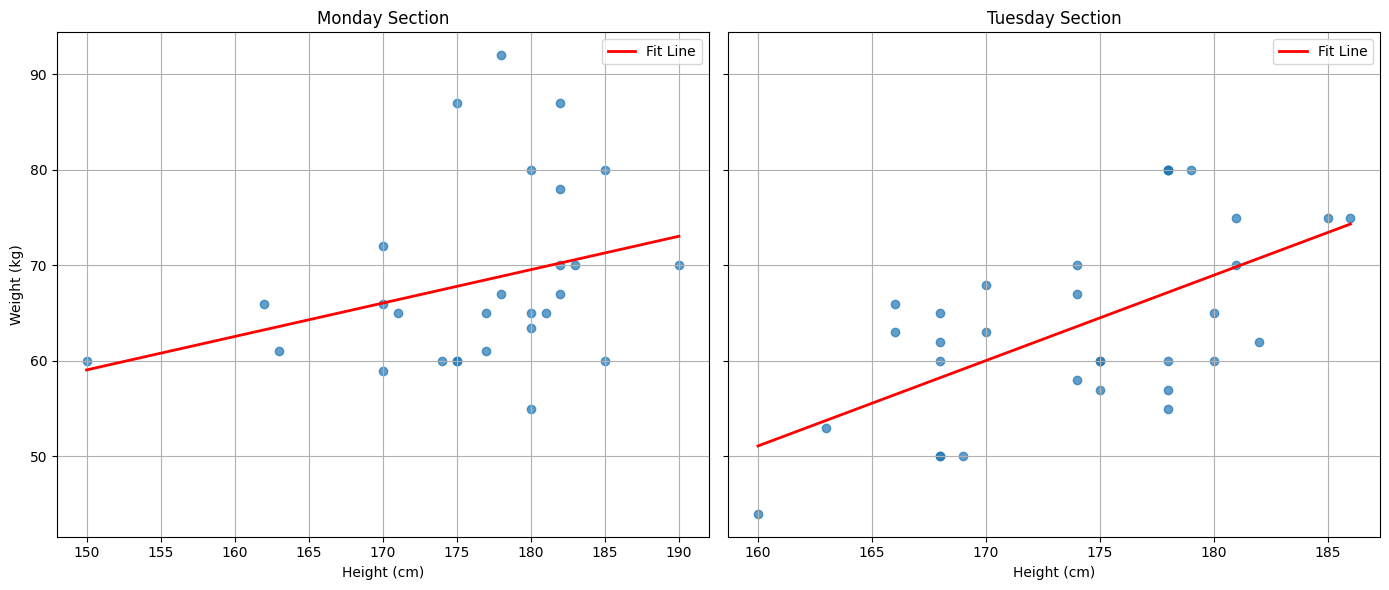

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np



monday = pd.read_excel('/Users/grand./Downloads/Monday section.xlsx')
tuesday = pd.read_excel('/Users/grand./Downloads/Tuesday section.xlsx')

# 2. 作图
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
for ax, data, title in zip(
    axes,
    [monday, tuesday],
    ['Monday Section', 'Tuesday Section']
):
    ax.scatter(data['Height (cm)'], data['Weight (kg)'], alpha=0.7)
    X = data[['Height (cm)']]
    y = data['Weight (kg)']
    model = LinearRegression().fit(X, y)
    xs = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    ys = model.predict(xs)
    ax.plot(xs, ys, color='red', linewidth=2, label='Fit Line')
    ax.set_title(title)
    ax.set_xlabel('Height (cm)')
    if ax is axes[0]:
        ax.set_ylabel('Weight (kg)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [12]:
import pandas as pd

# Load datasets from Excel files
monday_df = pd.read_excel('/Users/grand./Downloads/Monday section.xlsx')
tuesday_df = pd.read_excel('/Users/grand./Downloads/Tuesday section.xlsx')

# --- Monday Section Computations ---
# 1. Calculate means for height (x̄) and weight (ȳ)
mean_height_mon = monday_df['Height (cm)'].mean()
mean_weight_mon = monday_df['Weight (kg)'].mean()

# 2. Compute Sxx and Sxy for Monday (using deviations from the mean)
dev_height_mon = monday_df['Height (cm)'] - mean_height_mon
dev_weight_mon = monday_df['Weight (kg)'] - mean_weight_mon
Sxx_mon = (dev_height_mon ** 2).sum()
Sxy_mon = (dev_height_mon * dev_weight_mon).sum()

# 3. Compute slope (b1) and intercept (b0) for the regression line
slope_mon = Sxy_mon / Sxx_mon
intercept_mon = mean_weight_mon - slope_mon * mean_height_mon

# Output the intermediate values and results for Monday section
print("Monday Section:")
print(f"Mean height = {mean_height_mon:.3f} cm")
print(f"Mean weight = {mean_weight_mon:.3f} kg")
print(f"Sxx = {Sxx_mon:.3f}")
print(f"Sxy = {Sxy_mon:.3f}")
print(f"Slope (b1) = {slope_mon:.4f}")
print(f"Intercept (b0) = {intercept_mon:.4f}")
print()  # blank line for readability

# --- Tuesday Section Computations ---
# 1. Calculate means for height (x̄) and weight (ȳ)
mean_height_tue = tuesday_df['Height (cm)'].mean()
mean_weight_tue = tuesday_df['Weight (kg)'].mean()

# 2. Compute Sxx and Sxy for Tuesday
dev_height_tue = tuesday_df['Height (cm)'] - mean_height_tue
dev_weight_tue = tuesday_df['Weight (kg)'] - mean_weight_tue
Sxx_tue = (dev_height_tue ** 2).sum()
Sxy_tue = (dev_height_tue * dev_weight_tue).sum()

# 3. Compute slope (b1) and intercept (b0) for the regression line
slope_tue = Sxy_tue / Sxx_tue
intercept_tue = mean_weight_tue - slope_tue * mean_height_tue

# Output the intermediate values and results for Tuesday section
print("Tuesday Section:")
print(f"Mean height = {mean_height_tue:.3f} cm")
print(f"Mean weight = {mean_weight_tue:.3f} kg")
print(f"Sxx = {Sxx_tue:.3f}")
print(f"Sxy = {Sxy_tue:.3f}")
print(f"Slope (b1) = {slope_tue:.4f}")
print(f"Intercept (b0) = {intercept_tue:.4f}")


Monday Section:
Mean height = 176.321 cm
Mean weight = 68.268 kg
Sxx = 1828.107
Sxy = 639.589
Slope (b1) = 0.3499
Intercept (b0) = 6.5793

Tuesday Section:
Mean height = 174.156 cm
Mean weight = 63.750 kg
Sxx = 1304.219
Sxy = 1165.250
Slope (b1) = 0.8934
Intercept (b0) = -91.8493


In [13]:
import pandas as pd

# Load datasets
monday = pd.read_excel('/Users/grand./Downloads/Monday section.xlsx')
tuesday = pd.read_excel('/Users/grand./Downloads/Tuesday section.xlsx')

# Function to compute metrics
def compute_regression_metrics(df, name):
    x = df['Height (cm)']
    y = df['Weight (kg)']
    n = len(df)
    
    # Means
    x_bar = x.mean()
    y_bar = y.mean()
    
    # Sums of squares and cross-products
    Sxx = ((x - x_bar)**2).sum()
    Syy = ((y - y_bar)**2).sum()
    Sxy = ((x - x_bar) * (y - y_bar)).sum()
    
    # Regression coefficients
    b1 = Sxy / Sxx
    b0 = y_bar - b1 * x_bar
    
    # Predictions and residuals
    y_hat = b0 + b1 * x
    residuals = y - y_hat
    
    # SSE (Sum of Squared Errors) and variance estimate s^2
    SSE = (residuals**2).sum()
    s2 = SSE / (n - 2)
    
    print(f"\n{name} Section:")
    print(f"  n = {n}")
    print(f"  Mean height (x̄) = {x_bar:.3f} cm")
    print(f"  Mean weight (ȳ)   = {y_bar:.3f} kg")
    print(f"  Sxx = Σ(xᵢ - x̄)²  = {Sxx:.3f}")
    print(f"  Syy = Σ(yᵢ - ȳ)²  = {Syy:.3f}")
    print(f"  Sxy = Σ(xᵢ - x̄)(yᵢ - ȳ) = {Sxy:.3f}")
    print(f"  Regression slope (b1)  = {b1:.4f}")
    print(f"  Regression intercept (b0) = {b0:.4f}")
    print(f"  SSE = Σ(yᵢ - ŷᵢ)²       = {SSE:.3f}")
    print(f"  s² = SSE / (n - 2)      = {s2:.4f}")

# Compute for both sections
compute_regression_metrics(monday, "Monday")
compute_regression_metrics(tuesday, "Tuesday")


Monday Section:
  n = 28
  Mean height (x̄) = 176.321 cm
  Mean weight (ȳ)   = 68.268 kg
  Sxx = Σ(xᵢ - x̄)²  = 1828.107
  Syy = Σ(yᵢ - ȳ)²  = 2446.241
  Sxy = Σ(xᵢ - x̄)(yᵢ - ȳ) = 639.589
  Regression slope (b1)  = 0.3499
  Regression intercept (b0) = 6.5793
  SSE = Σ(yᵢ - ŷᵢ)²       = 2222.472
  s² = SSE / (n - 2)      = 85.4797

Tuesday Section:
  n = 32
  Mean height (x̄) = 174.156 cm
  Mean weight (ȳ)   = 63.750 kg
  Sxx = Σ(xᵢ - x̄)²  = 1304.219
  Syy = Σ(yᵢ - ȳ)²  = 2902.000
  Sxy = Σ(xᵢ - x̄)(yᵢ - ȳ) = 1165.250
  Regression slope (b1)  = 0.8934
  Regression intercept (b0) = -91.8493
  SSE = Σ(yᵢ - ŷᵢ)²       = 1860.911
  s² = SSE / (n - 2)      = 62.0304


In [14]:
import pandas as pd

# Load datasets
monday = pd.read_excel('/Users/grand./Downloads/Monday section.xlsx')
tuesday = pd.read_excel('/Users/grand./Downloads/Tuesday section.xlsx')

# Function to compute metrics including SST and SSR
def compute_regression_metrics(df, name):
    x = df['Height (cm)']
    y = df['Weight (kg)']
    n = len(df)
    
    # Means
    x_bar = x.mean()
    y_bar = y.mean()
    
    # Sums of squares and cross-products
    Sxx = ((x - x_bar)**2).sum()
    Syy = ((y - y_bar)**2).sum()       # Total Sum of Squares (SST)
    Sxy = ((x - x_bar) * (y - y_bar)).sum()
    
    # Regression coefficients
    b1 = Sxy / Sxx
    b0 = y_bar - b1 * x_bar
    
    # Predictions and residuals
    y_hat = b0 + b1 * x
    residuals = y - y_hat
    
    # Sum of Squared Errors (SSE) and variance estimate s^2
    SSE = (residuals**2).sum()
    s2 = SSE / (n - 2)
    
    # Regression Sum of Squares (SSR)
    SSR = ((y_hat - y_bar)**2).sum()
    
    # Print results
    print(f"\n{name} Section:")
    print(f"  n = {n}")
    print(f"  Mean height (x̄)       = {x_bar:.3f} cm")
    print(f"  Mean weight (ȳ)         = {y_bar:.3f} kg")
    print(f"  Sxx = Σ(xᵢ - x̄)²        = {Sxx:.3f}")
    print(f"  Syy (SST) = Σ(yᵢ - ȳ)²   = {Syy:.3f}")
    print(f"  Sxy = Σ(xᵢ - x̄)(yᵢ - ȳ)  = {Sxy:.3f}")
    print(f"  Regression slope (b1)   = {b1:.4f}")
    print(f"  Regression intercept (b0)= {b0:.4f}")
    print(f"  SSR = Σ(ŷᵢ - ȳ)²        = {SSR:.3f}")
    print(f"  SSE = Σ(yᵢ - ŷᵢ)²       = {SSE:.3f}")
    print(f"  s² = SSE / (n - 2)       = {s2:.4f}")

# Compute for both sections
compute_regression_metrics(monday, "Monday")
compute_regression_metrics(tuesday, "Tuesday")



Monday Section:
  n = 28
  Mean height (x̄)       = 176.321 cm
  Mean weight (ȳ)         = 68.268 kg
  Sxx = Σ(xᵢ - x̄)²        = 1828.107
  Syy (SST) = Σ(yᵢ - ȳ)²   = 2446.241
  Sxy = Σ(xᵢ - x̄)(yᵢ - ȳ)  = 639.589
  Regression slope (b1)   = 0.3499
  Regression intercept (b0)= 6.5793
  SSR = Σ(ŷᵢ - ȳ)²        = 223.769
  SSE = Σ(yᵢ - ŷᵢ)²       = 2222.472
  s² = SSE / (n - 2)       = 85.4797

Tuesday Section:
  n = 32
  Mean height (x̄)       = 174.156 cm
  Mean weight (ȳ)         = 63.750 kg
  Sxx = Σ(xᵢ - x̄)²        = 1304.219
  Syy (SST) = Σ(yᵢ - ȳ)²   = 2902.000
  Sxy = Σ(xᵢ - x̄)(yᵢ - ȳ)  = 1165.250
  Regression slope (b1)   = 0.8934
  Regression intercept (b0)= -91.8493
  SSR = Σ(ŷᵢ - ȳ)²        = 1041.089
  SSE = Σ(yᵢ - ŷᵢ)²       = 1860.911
  s² = SSE / (n - 2)       = 62.0304


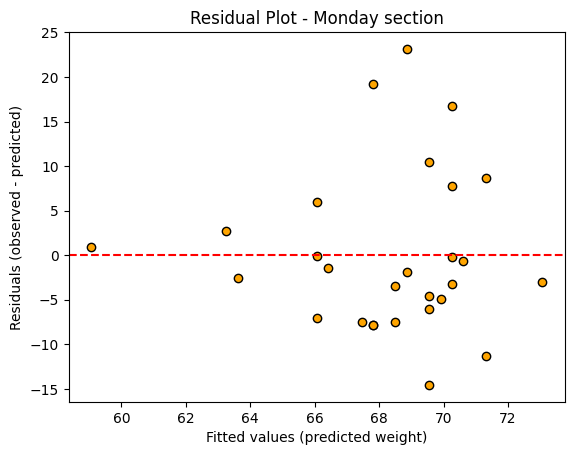

In [15]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load Monday section data
monday_df = pd.read_excel("/Users/grand./Downloads/Monday section.xlsx")

# Fit linear model: Weight ~ Height
X = sm.add_constant(monday_df['Height (cm)'])
y = monday_df['Weight (kg)']
model_monday = sm.OLS(y, X).fit()

# Compute residuals and fitted values
residuals_monday = model_monday.resid
fitted_monday   = model_monday.fittedvalues

# Plot residuals vs. fitted values
plt.scatter(fitted_monday, residuals_monday, color="orange", edgecolor="k")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values (predicted weight)")
plt.ylabel("Residuals (observed - predicted)")
plt.title("Residual Plot - Monday section")
plt.show()


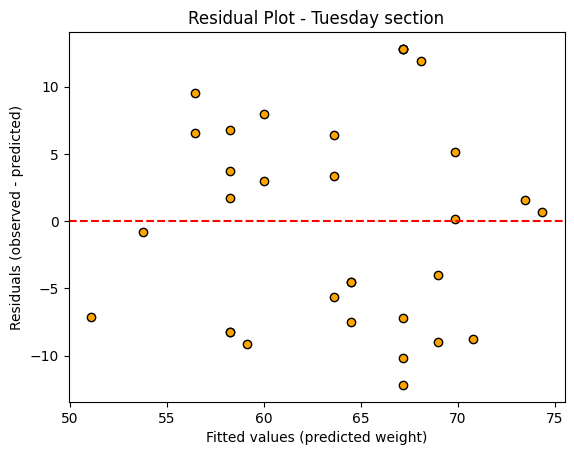

In [16]:
# Load Tuesday section data
tuesday_df = pd.read_excel("/Users/grand./Downloads/Tuesday section.xlsx")

# Fit linear model: Weight ~ Height
X = sm.add_constant(tuesday_df['Height (cm)'])
y = tuesday_df['Weight (kg)']
model_tuesday = sm.OLS(y, X).fit()

# Compute residuals and fitted values
residuals_tuesday = model_tuesday.resid
fitted_tuesday   = model_tuesday.fittedvalues

# Plot residuals vs. fitted values
plt.scatter(fitted_tuesday, residuals_tuesday, color="orange", edgecolor="k")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values (predicted weight)")
plt.ylabel("Residuals (observed - predicted)")
plt.title("Residual Plot - Tuesday section")
plt.show()
